In [1]:
# Title: Basic Structure of a Neural Network

# Neurons, Weights, Biases

# Task 1: Neuron Calculation
# Task: Calculate the output of a single artificial neuron given specific inputs, weights, and bias.
# Exercise: Perform this calculation for a given set of inputs and verify your result.

# Task 2: Adjusting Weights
# Task: Learn how adjusting weights affects the output of a neural network.
# Exercise: Alter the weights and observe the change in the final output.

# Task 3 : Role of Bias
# Task: Understand the impact of bias on a neuron's output.
# Exercise: Add different bias values to a neuron and note the effect on the network's results.


# Input Layer, Hidden Layers, Output Layer

# Task 1: Network Structure Visualization
# Task: Draw the basic structure of a neural network with input, hidden, and output layers.
# Exercise: Label each layer and state its function.

# Task 2: Information Flow in Network Layers
# Task: Follow and describe the flow of data from input to output across layers.
# Exercise: Map out the flow path and indicate any transformations that occur.

# Task 3: Number of Layers Impact
# Task: Explore how the number of layers in a network affects its complexity and performance.
# Exercise: Experiment with networks of different layer counts and compare their performance on a task.

=== Task 1: Neuron Calculation ===
Output of the neuron: 0.5474

=== Task 2: Adjusting Weights ===
Output with adjusted weights: 0.4950

=== Task 3: Role of Bias ===
Bias: -0.5, Output: 0.3989
Bias: 0, Output: 0.5225
Bias: 0.5, Output: 0.6434

=== Task 4: Network Structure Visualization ===


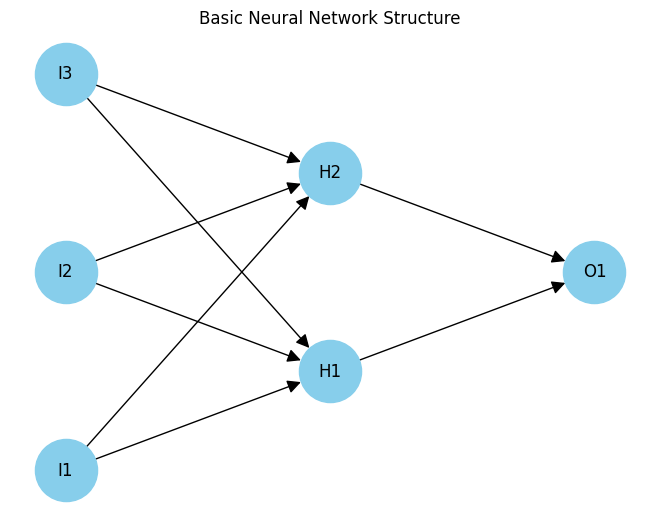


=== Task 5: Information Flow in Network Layers ===

- Data enters at Input Layer (I1, I2, I3).
- Inputs are weighted and summed in Hidden Layer neurons (H1, H2).
- Hidden layer applies activation functions.
- Outputs from Hidden Layer feed into Output Layer neuron (O1).
- Output neuron calculates final prediction or classification.


=== Task 6: Number of Layers Impact ===

Network with 1 hidden layer:
Layer 1 output: [0.35434369 0.4378235 ]
Layer 2 output: [0.36337748]

Network with 2 hidden layers:
Layer 1 output: [0.35434369 0.4378235 ]
Layer 2 output: [0.4234763  0.50104319]
Layer 3 output: [0.34365252]

More layers increase the network’s ability to learn complex patterns but also increase computational cost and risk of overfitting.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

print("=== Task 1: Neuron Calculation ===")

def neuron_output(inputs, weights, bias):
    """Calculate output of a single neuron (weighted sum + bias)"""
    weighted_sum = np.dot(inputs, weights) + bias
    output = 1 / (1 + np.exp(-weighted_sum))  # Sigmoid activation
    return output

# Example values
inputs = np.array([0.5, -0.2, 0.1])
weights = np.array([0.4, 0.3, -0.5])
bias = 0.1

output = neuron_output(inputs, weights, bias)
print(f"Output of the neuron: {output:.4f}")

print("\n=== Task 2: Adjusting Weights ===")

# Change weights and observe output
new_weights = np.array([0.1, 0.8, -0.1])
new_output = neuron_output(inputs, new_weights, bias)
print(f"Output with adjusted weights: {new_output:.4f}")

print("\n=== Task 3: Role of Bias ===")

# Try different biases
for b in [-0.5, 0, 0.5]:
    out = neuron_output(inputs, weights, b)
    print(f"Bias: {b}, Output: {out:.4f}")

# -----------------------------------

print("\n=== Task 4: Network Structure Visualization ===")

def draw_simple_network():
    G = nx.DiGraph()
    
    # Layers
    input_nodes = ['I1', 'I2', 'I3']
    hidden_nodes = ['H1', 'H2']
    output_nodes = ['O1']
    
    # Add nodes with layer attribute
    for node in input_nodes:
        G.add_node(node, layer='input')
    for node in hidden_nodes:
        G.add_node(node, layer='hidden')
    for node in output_nodes:
        G.add_node(node, layer='output')
    
    # Connect layers fully
    for i in input_nodes:
        for h in hidden_nodes:
            G.add_edge(i, h)
    for h in hidden_nodes:
        for o in output_nodes:
            G.add_edge(h, o)
    
    pos = {}
    # Position nodes by layer
    for i, node in enumerate(input_nodes):
        pos[node] = (0, i)
    for i, node in enumerate(hidden_nodes):
        pos[node] = (1, i + 0.5)
    for i, node in enumerate(output_nodes):
        pos[node] = (2, 1)
    
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', arrowsize=20)
    plt.title("Basic Neural Network Structure")
    plt.show()

draw_simple_network()

print("\n=== Task 5: Information Flow in Network Layers ===")
print("""
- Data enters at Input Layer (I1, I2, I3).
- Inputs are weighted and summed in Hidden Layer neurons (H1, H2).
- Hidden layer applies activation functions.
- Outputs from Hidden Layer feed into Output Layer neuron (O1).
- Output neuron calculates final prediction or classification.
""")

print("\n=== Task 6: Number of Layers Impact ===")

# Simple demo: try networks with different hidden layer counts

def simple_feedforward(inputs, weights_list, biases_list):
    # inputs: np.array
    # weights_list: list of weight matrices for each layer
    # biases_list: list of bias vectors for each layer
    
    layer_input = inputs
    for i, (weights, biases) in enumerate(zip(weights_list, biases_list)):
        layer_output = 1 / (1 + np.exp(np.dot(layer_input, weights) + biases))  # Sigmoid activation
        layer_input = layer_output
        print(f"Layer {i+1} output: {layer_output}")
    return layer_output

# 1 hidden layer network
inputs = np.array([1, 0.5])
weights_1 = np.array([[0.4, 0.3], [0.2, 0.1]])  # 2 inputs to 2 hidden neurons
biases_1 = np.array([0.1, -0.1])

weights_out_1 = np.array([[0.7], [0.6]])  # hidden to output
biases_out_1 = np.array([0.05])

print("\nNetwork with 1 hidden layer:")
hidden_out = simple_feedforward(inputs, [weights_1, weights_out_1], [biases_1, biases_out_1])

# 2 hidden layers network
weights_2_1 = np.array([[0.4, 0.3], [0.2, 0.1]])  # input to hidden1
biases_2_1 = np.array([0.1, -0.1])

weights_2_2 = np.array([[0.5, -0.4], [0.3, 0.2]])  # hidden1 to hidden2
biases_2_2 = np.array([0.0, 0.05])

weights_out_2 = np.array([[0.7], [0.6]])  # hidden2 to output
biases_out_2 = np.array([0.05])

print("\nNetwork with 2 hidden layers:")
hidden_out = simple_feedforward(inputs, [weights_2_1, weights_2_2, weights_out_2], [biases_2_1, biases_2_2, biases_out_2])

print("""
More layers increase the network’s ability to learn complex patterns but also increase computational cost and risk of overfitting.
""")
